## 8.4 Exercise: Off lattice Monte Carlo of Lennard Jones particles

The Lennard-Jones interaction is another paradigmatic interaction potential, often used to implement "self-
avoidance" in MD simulations or as a paradigmatic example of gas-liquid phase separation. It reads
$$V_{\text{LJ}}(r)=\begin{cases}4\epsilon\left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^6\right]&\text{for}r<\sigma_{cut}\\0&\text{for}r\ge\sigma_{cut}\end{cases}$$


where $\sigma=1,\epsilon=1$ are the units of length and energy and $\sigma_cut$ is the so-called cut-off length and is set, for this exercise, to half the box size. Beyond this cut-off, we introduce two tail corrections: one for the energy (pere) particle)


$$u^{tail}=\dfrac{8}{3}\pi\rho\left[\dfrac{1}{3}\left(\dfrac{\sigma}{\sigma_{cut}}\right)^9-\left(\dfrac{\sigma}{\sigma_{cut}}\right)^3\right]$$
and one for the pressure
$$P^{tail}=\dfrac{16}{3}\pi\rho^2\left[\dfrac{2}{3}\left(\dfrac{\sigma}{\sigma_{cut}}\right)^9-\left(\dfrac{\sigma}{\sigma_{cut}}\right)^3\right]$$
Perform two sets of simulations, one at reduced temperature $T^*=2$ (above the critical temperature) and
one at $T^*=0.9$ (well below the critical temperature) an compute, for both cases, the equation of state in the pressure-density plane. Compare the results with the equation of state for the two temperature (data shared $\operatorname{in}$Google Drive).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Equation of state

| Parameter          | Value   |
|--------------------|---------|
| `m`                | 1       |
| `disp_max`         | 0.05    |
| `NSteps`           | 100     |
| `realiz`           | 100     |
| `T`                | 0.9 or 2.0     |
| `seed`             | time(0) |
| `L`                | 5       |
| `sigma`            | 1.0     |
| `sigma_cut`        | `L / 2.0` |
| `eps`              | 1.0     |
| `radius`           | 1.0001  |


In [2]:
# Load the simulated data
P_2 = np.loadtxt("LJ_P_T2_dmax1.txt")
P_09 = np.loadtxt("LJ_P_T09_dmax1.txt")

# Load the reference data from drive
P_2_true = np.loadtxt("LJ_T2.dat")
P_09_true = np.loadtxt("LJ_T09.txt")

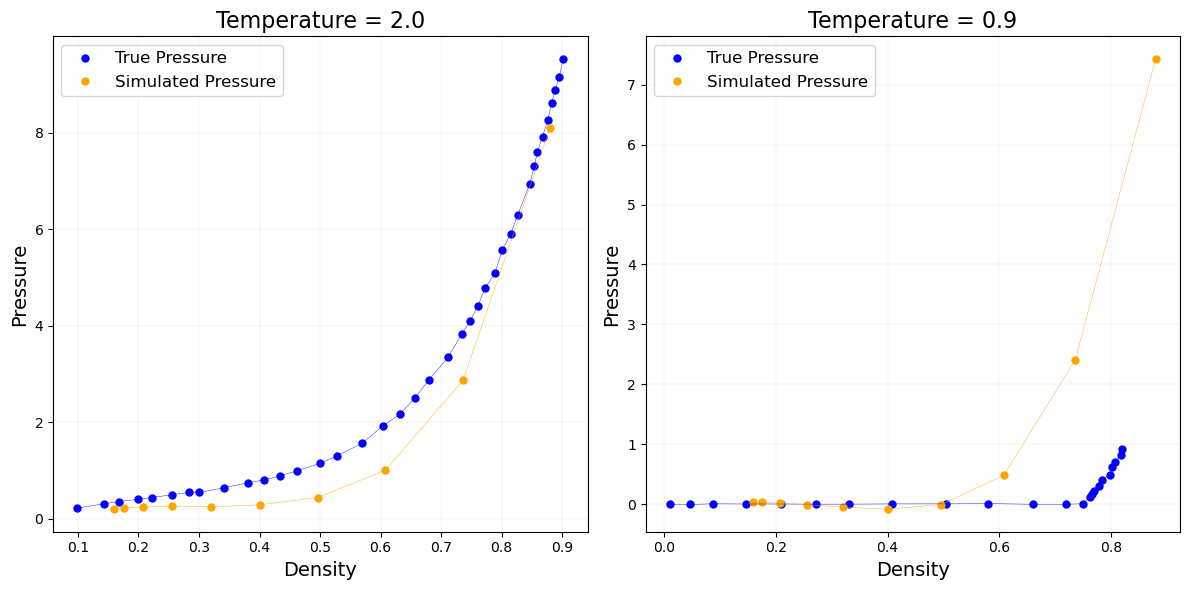

In [3]:
# Plotting
plt.figure(figsize=(12, 6))

# High temperature plot
plt.subplot(1, 2, 1)
plt.plot(P_2_true[:, 0], P_2_true[:, 1], 'o', color='blue', label='True Pressure', markersize=5)
plt.plot(P_2[:, 0], P_2[:, 1], 'o', color='orange', label='Simulated Pressure', markersize=5)
plt.plot(P_2_true[:, 0], P_2_true[:, 1], color='blue', lw=0.3)
plt.plot(P_2[:, 0], P_2[:, 1], color='orange', lw=0.3)
plt.title('Temperature = 2.0', fontsize=16)
plt.xlabel('Density', fontsize=14)
plt.ylabel('Pressure', fontsize=14)
plt.grid(lw = 0.1)
plt.legend(fontsize=12)


# Low temperature plot
plt.subplot(1, 2, 2)
plt.plot(P_09_true[:, 0], P_09_true[:, 1], 'o', color='blue', label='True Pressure', markersize=5)
plt.plot(P_09[:, 0], P_09[:, 1], 'o', color='orange', label='Simulated Pressure', markersize=5)
plt.plot(P_09_true[:, 0], P_09_true[:, 1], color='blue', lw=0.3)
plt.plot(P_09[:, 0], P_09[:, 1], color='orange', lw=0.3)
plt.title('Temperature = 0.9', fontsize=16)
plt.xlabel('Density', fontsize=14)
plt.ylabel('Pressure', fontsize=14)
plt.grid(lw = 0.1)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

## Discussion
The figure shows the equation of state of the Lennard-Jones fluid, at $T= 2.0$ and $T=0.9$. In particular:
* the orange circles represents the equation of state;
* the blue circles are the results of the simulations;

In the simulation below critical temperature we notice an horizontal line, which is the saturated vapor pressure, meaning the vapor-liquid coexistence.
Notice that if we cool the system below the critical temperature, we should expect to observe vapor-liquid coexistence, where the pressure is independent of density as long as both phases coexist. However, conventional Monte Carlo or Molecular Dynamics simulations of small model systems are not suited to study the coexistence between two phases. In fact the agreement of the simulation with the theory is not so good in this case. We observe that, over a wide density range, the simulated system is metastable and even have a negative pressure.

In the simulation above the critical temperature, the agreement is quite good.


#### In depth: simulation below critical temperature
In simulations above the critical temperature, there's notable agreement between the model and reality. However, in finite systems, creating a liquid-vapor interface incurs significant free-energy costs. Consequently, for sufficiently small systems, it's actually favorable for them not to phase separate. This challenge is most pronounced in small systems and when the interfacial free energy is high.
For this reason, standard NVT-simulations are not recommended to determine the vapor-liquid coexistence curve or, for that matter, any strong first-order phase transition.